<a href="https://colab.research.google.com/github/RitaRitaIsOOO/Parks_WO_Analysis/blob/master/parks_wo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import pandas as pd
import pandas.util.testing as tm
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

print('import successful')

import successful


In [66]:
DPRwo_orig = pd.read_csv('https://data.cityofnewyork.us/api/views/8sdw-8vja/rows.csv?accessType=DOWNLOAD', index_col=None, na_values=['NA'],
sep=',',low_memory=False)

DPRassets_orig = pd.read_csv('https://data.cityofnewyork.us/api/views/e25p-jzfy/rows.csv?accessType=DOWNLOAD', index_col=None, na_values=['NA'],
sep=',',low_memory=False)

parks_orig = pd.read_csv('https://data.cityofnewyork.us/api/views/enfh-gkve/rows.csv?accessType=DOWNLOAD', index_col=None, na_values=['NA'],
sep=',',low_memory=False)

WO = DPRwo_orig.copy()
print('data loaded successfully')
#WO.set_index(['EVT_CODE'], drop=True,inplace=True)
#print('index set')
asset = DPRassets_orig.copy()
print ('asset data loaded successfully')
parks = parks_orig.copy()
print ('parks properties data loaded succefully')

data loaded successfully
asset data loaded successfully
parks properties data loaded succefully


In [67]:
type(WO)
type(asset)


pandas.core.frame.DataFrame

In [68]:
WO.head(1)


,EVT_CODE,EVT_DESC,EVT_TYPE,EVT_DATE,EVT_MRC,EVT_PRINTED,EVT_OBTYPE,EVT_OBJECT,EVT_STANDWORK,EVT_PPM,EVT_FREQ,EVT_ISSTYPE,EVT_CLASS,EVT_ROUTE,EVT_TARGET,EVT_DURATION,EVT_PARENT,EVT_REQM,EVT_JOBTYPE,EVT_PRIORITY,EVT_REPORTED,EVT_START,EVT_DUE,EVT_COMPLETED,EVT_WARRANTY,EVT_SAFETY,EVT_REOPENED,EVT_SCHEDEND,EVT_CREATED,EVT_UPDATED,EVT_UPDATECOUNT,EVT_PERIODUOM,EVT_SQLIDENTITY,EVT_MULTIEQUIP,EVT_COMPLETED_TRUNC,EVT_UDFCHAR01,EVT_UDFCHAR02,EVT_UDFCHAR03,EVT_UDFCHAR04,EVT_UDFCHAR05,EVT_UDFCHAR06,EVT_UDFCHAR08,EVT_UDFCHAR10,EVT_UDFCHAR11,EVT_UDFCHAR12,EVT_UDFCHAR13,EVT_UDFCHAR14,EVT_UDFCHAR15,EVT_UDFCHAR16,EVT_UDFNUM01,EVT_UDFNUM02,EVT_UDFCHKBOX01,EVT_UDFCHKBOX02,EVT_UDFCHKBOX03,EVT_UDFCHKBOX04,EVT_UDFCHKBOX05
0,1698630,Rat Abatement,JOB,May 19 2018 8:58AM,M-03,-,S,M358-GT001,NaN,NaN,NaN,F,NaN,NaN,Jul 6 2018 12:00AM,26,NaN,NaN,GTBR,1-LOW,May 19 2018 8:58AM,NaN,NaN,NaN,-,-,-,Jul 31 2018 12:00AM,May 19 2018 9:31AM,Apr 11 2019 9:54AM,4,NaN,1671524,-,NaN,4. URG,NaN,GRNTHUMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GT Open,NaN,NaN,NaN,NaN,NaN,+,-,-,+,-


In [69]:
asset.head(1)

,OBJ_OBTYPE,OBJ_CODE,OBJ_DESC,OBJ_CLASS,OBJ_CATEGORY,OBJ_POSITION,OBJ_PARENT,OBJ_MANUFACT,OBJ_MRC,OBJ_SERIALNO,OBJ_STATUS,OBJ_COMMISS,OBJ_WITHDRAW,OBJ_RECORD,OBJ_NOTUSED,OBJ_MANUFACTMODEL,OBJ_VALUE,OBJ_UPDATED,OBJ_UPDATECOUNT,OBJ_GISOBJID,OBJ_SQLIDENTITY,OBJ_GISLAYER,OBJ_XLOCATION,OBJ_YLOCATION,OBJ_UDFCHAR01,OBJ_UDFCHAR02,OBJ_UDFCHAR05,OBJ_UDFCHAR06,OBJ_CREATED
0,*,*,ANY OBJECT,NaN,NaN,NaN,NaN,NaN,*,NaN,I,NaN,NaN,Jan 6 2009 10:20AM,NaN,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
parks.head(1)

,ACQUISITIONDATE,ACRES,ADDRESS,BOROUGH,CLASS,COMMISSIONDATE,COMMUNITYBOARD,COUNCILDISTRICT,DEPARTMENT,EAPPLY,GISOBJID,GISPROPNUM,GlobalID,JURISDICTION,LOCATION,MAPPED,NAME311,NYS_ASSEMBLY,NYS_SENATE,OBJECTID,OMPPROPID,PARENTID,PERMIT,PERMITDISTRICT,PERMITPARENT,PIP_RATABLE,PRECINCT,RETIRED,SIGNNAME,SUBCATEGORY,TYPECATEGORY,URL,US_CONGRESS,WATERFRONT,ZIPCODE,multipolygon
0,1949-03-24 00:00:00.0000000,2.035,NaN,Q,PARK,NaN,411,23.0,Q-11,Challenge Playground,100000009,Q346,F083B449-6079-40A5-A938-1771F8B763F7,DPR/DOE,251 St. bet. 61 Ave. and 63 Ave.,False,Challenge Playground,26,11.0,6293,Q346,Q-11,True,Q-11,Q-11,True,111.0,False,Challenge Playground,JOP,Jointly Operated Playground,http://www.nycgovparks.org/parks/Q346/,3.0,False,11362,MULTIPOLYGON (((-73.72738293199147 40.75605209...


In [71]:
amps_merge = pd.merge(WO, asset, left_on='EVT_OBJECT', right_on='OBJ_CODE', how='inner')
amps = amps_merge
amps.head(3)




,EVT_CODE,EVT_DESC,EVT_TYPE,EVT_DATE,EVT_MRC,EVT_PRINTED,EVT_OBTYPE,EVT_OBJECT,EVT_STANDWORK,EVT_PPM,EVT_FREQ,EVT_ISSTYPE,EVT_CLASS,EVT_ROUTE,EVT_TARGET,EVT_DURATION,EVT_PARENT,EVT_REQM,EVT_JOBTYPE,EVT_PRIORITY,EVT_REPORTED,EVT_START,EVT_DUE,EVT_COMPLETED,EVT_WARRANTY,EVT_SAFETY,EVT_REOPENED,EVT_SCHEDEND,EVT_CREATED,EVT_UPDATED,EVT_UPDATECOUNT,EVT_PERIODUOM,EVT_SQLIDENTITY,EVT_MULTIEQUIP,EVT_COMPLETED_TRUNC,EVT_UDFCHAR01,EVT_UDFCHAR02,EVT_UDFCHAR03,EVT_UDFCHAR04,EVT_UDFCHAR05,...,EVT_UDFCHAR13,EVT_UDFCHAR14,EVT_UDFCHAR15,EVT_UDFCHAR16,EVT_UDFNUM01,EVT_UDFNUM02,EVT_UDFCHKBOX01,EVT_UDFCHKBOX02,EVT_UDFCHKBOX03,EVT_UDFCHKBOX04,EVT_UDFCHKBOX05,OBJ_OBTYPE,OBJ_CODE,OBJ_DESC,OBJ_CLASS,OBJ_CATEGORY,OBJ_POSITION,OBJ_PARENT,OBJ_MANUFACT,OBJ_MRC,OBJ_SERIALNO,OBJ_STATUS,OBJ_COMMISS,OBJ_WITHDRAW,OBJ_RECORD,OBJ_NOTUSED,OBJ_MANUFACTMODEL,OBJ_VALUE,OBJ_UPDATED,OBJ_UPDATECOUNT,OBJ_GISOBJID,OBJ_SQLIDENTITY,OBJ_GISLAYER,OBJ_XLOCATION,OBJ_YLOCATION,OBJ_UDFCHAR01,OBJ_UDFCHAR02,OBJ_UDFCHAR05,OBJ_UDFCHAR06,OBJ_CREATED
0,1698630,Rat Abatement,JOB,May 19 2018 8:58AM,M-03,-,S,M358-GT001,NaN,NaN,NaN,F,NaN,NaN,Jul 6 2018 12:00AM,26,NaN,NaN,GTBR,1-LOW,May 19 2018 8:58AM,NaN,NaN,NaN,-,-,-,Jul 31 2018 12:00AM,May 19 2018 9:31AM,Apr 11 2019 9:54AM,4,NaN,1671524,-,NaN,4. URG,NaN,GRNTHUMB,NaN,NaN,...,GT Open,NaN,NaN,NaN,NaN,NaN,+,-,-,+,-,S,M358-GT001,First Street Garden,GRNTHUMB,NaN,NaN,M358,NaN,M-03,NaN,I,Dec 18 2018 12:00AM,NaN,Apr 14 2020 2:20PM,-,NaN,NaN,Apr 14 2020 2:20PM,5,100041153.0,117356,Greenthumb,987131.93156,203054.141841,NaN,NaN,005 - Spanish/Chinese,NaN,Dec 18 2018 3:23PM
1,1833744,S M358-GT001 -V,IN,Dec 18 2018 3:23PM,M-03,-,S,M358-GT001,NaN,NaN,NaN,F,NaN,NaN,Dec 18 2018 12:00AM,1,NaN,NaN,NaN,NaN,Dec 18 2018 3:23PM,NaN,NaN,Dec 18 2018 3:23PM,-,-,-,Dec 18 2018 12:00AM,Dec 18 2018 3:23PM,NaN,1,NaN,1787928,-,Dec 18 2018 12:00AM,NaN,NaN,NaN,NaN,NaN,...,Completed,NaN,NaN,NaN,NaN,NaN,-,-,-,-,-,S,M358-GT001,First Street Garden,GRNTHUMB,NaN,NaN,M358,NaN,M-03,NaN,I,Dec 18 2018 12:00AM,NaN,Apr 14 2020 2:20PM,-,NaN,NaN,Apr 14 2020 2:20PM,5,100041153.0,117356,Greenthumb,987131.93156,203054.141841,NaN,NaN,005 - Spanish/Chinese,NaN,Dec 18 2018 3:23PM
2,1834058,S M358-GT001 --> S M358,AA,Dec 18 2018 3:53PM,M-03,-,S,M358-GT001,NaN,NaN,NaN,F,NaN,NaN,Dec 18 2018 12:00AM,1,NaN,NaN,NaN,NaN,Dec 18 2018 3:53PM,NaN,NaN,Dec 18 2018 3:53PM,-,-,-,Dec 18 2018 12:00AM,Dec 18 2018 3:53PM,NaN,1,NaN,1788242,-,Dec 18 2018 12:00AM,NaN,NaN,NaN,NaN,NaN,...,Completed,NaN,NaN,NaN,NaN,NaN,-,-,-,-,-,S,M358-GT001,First Street Garden,GRNTHUMB,NaN,NaN,M358,NaN,M-03,NaN,I,Dec 18 2018 12:00AM,NaN,Apr 14 2020 2:20PM,-,NaN,NaN,Apr 14 2020 2:20PM,5,100041153.0,117356,Greenthumb,987131.93156,203054.141841,NaN,NaN,005 - Spanish/Chinese,NaN,Dec 18 2018 3:23PM


In [72]:
parks_amps_merge = pd.merge(amps, parks, left_on = 'EVT_OBJECT', right_on = 'OMPPROPID', how = 'inner')
parks_wo = parks_amps_merge
parks_wo.head(1)

,EVT_CODE,EVT_DESC,EVT_TYPE,EVT_DATE,EVT_MRC,EVT_PRINTED,EVT_OBTYPE,EVT_OBJECT,EVT_STANDWORK,EVT_PPM,EVT_FREQ,EVT_ISSTYPE,EVT_CLASS,EVT_ROUTE,EVT_TARGET,EVT_DURATION,EVT_PARENT,EVT_REQM,EVT_JOBTYPE,EVT_PRIORITY,EVT_REPORTED,EVT_START,EVT_DUE,EVT_COMPLETED,EVT_WARRANTY,EVT_SAFETY,EVT_REOPENED,EVT_SCHEDEND,EVT_CREATED,EVT_UPDATED,EVT_UPDATECOUNT,EVT_PERIODUOM,EVT_SQLIDENTITY,EVT_MULTIEQUIP,EVT_COMPLETED_TRUNC,EVT_UDFCHAR01,EVT_UDFCHAR02,EVT_UDFCHAR03,EVT_UDFCHAR04,EVT_UDFCHAR05,...,OBJ_UDFCHAR02,OBJ_UDFCHAR05,OBJ_UDFCHAR06,OBJ_CREATED,ACQUISITIONDATE,ACRES,ADDRESS,BOROUGH,CLASS,COMMISSIONDATE,COMMUNITYBOARD,COUNCILDISTRICT,DEPARTMENT,EAPPLY,GISOBJID,GISPROPNUM,GlobalID,JURISDICTION,LOCATION,MAPPED,NAME311,NYS_ASSEMBLY,NYS_SENATE,OBJECTID,OMPPROPID,PARENTID,PERMIT,PERMITDISTRICT,PERMITPARENT,PIP_RATABLE,PRECINCT,RETIRED,SIGNNAME,SUBCATEGORY,TYPECATEGORY,URL,US_CONGRESS,WATERFRONT,ZIPCODE,multipolygon
0,1853327,DELIVERY of 30 c/y of soil/compost mix to Sout...,JOB,Feb 1 2019 4:15PM,B-06,-,S,B559,NaN,NaN,NaN,F,NaN,NaN,Feb 1 2019 12:00AM,1,NaN,NaN,GTBR,NaN,Feb 1 2019 4:15PM,NaN,NaN,NaN,-,-,-,Feb 1 2019 12:00AM,Feb 1 2019 4:16PM,Feb 14 2019 9:41AM,1,NaN,1807410,-,NaN,3. HIGH,NaN,GRNTHUMB,NaN,NaN,...,NaN,001 - Spanish/French,NaN,NaN,2016-01-19 00:00:00.0000000,0.083,204 COLUMBIA STREET,B,PARK,2016-02-22 00:00:00.0000000,306,39.0,B-06,NaN,100024465,B559,F9E0F402-B606-4C84-87BD-982AD6C63003,DPR,Columbia St. bet. Sackett St. and De Graw St.,NaN,South Brooklyn Children's Garden,52,26.0,11889,B559,B-06,NaN,B-06,B-06,NaN,76.0,False,South Brooklyn Children's Garden,NaN,Garden,NaN,7.0,False,11231,MULTIPOLYGON (((-74.00273402302695 40.68521366...


In [73]:
parks_wo.info() # info() is an instance method

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708810 entries, 0 to 708809
Columns: 121 entries, EVT_CODE to multipolygon
dtypes: bool(2), float64(13), int64(9), object(97)
memory usage: 650.3+ MB


In [74]:
parks_wo.columns

Index(['EVT_CODE', 'EVT_DESC', 'EVT_TYPE', 'EVT_DATE', 'EVT_MRC',
       'EVT_PRINTED', 'EVT_OBTYPE', 'EVT_OBJECT', 'EVT_STANDWORK', 'EVT_PPM',
       ...
       'PRECINCT', 'RETIRED', 'SIGNNAME', 'SUBCATEGORY', 'TYPECATEGORY', 'URL',
       'US_CONGRESS', 'WATERFRONT', 'ZIPCODE', 'multipolygon'],
      dtype='object', length=121)

In [75]:
dpr_wo_final = parks_wo[['EVT_CODE','EVT_DESC', 'EVT_TYPE', 'EVT_DATE','EVT_OBJECT','EVT_START','EVT_COMPLETED','EVT_CREATED',
          'EVT_COMPLETED_TRUNC','OBJ_OBTYPE', 'OBJ_CODE', 'OBJ_DESC',
          'OBJ_XLOCATION', 'OBJ_YLOCATION','BOROUGH','COMMUNITYBOARD', 'COUNCILDISTRICT',
       'DEPARTMENT', 'GISPROPNUM','OMPPROPID','SIGNNAME', ]]

dpr_wo_final.columns
dpr_wo_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708810 entries, 0 to 708809
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   EVT_CODE             708810 non-null  int64  
 1   EVT_DESC             708770 non-null  object 
 2   EVT_TYPE             708810 non-null  object 
 3   EVT_DATE             708810 non-null  object 
 4   EVT_OBJECT           708810 non-null  object 
 5   EVT_START            296356 non-null  object 
 6   EVT_COMPLETED        701290 non-null  object 
 7   EVT_CREATED          708810 non-null  object 
 8   EVT_COMPLETED_TRUNC  701290 non-null  object 
 9   OBJ_OBTYPE           708810 non-null  object 
 10  OBJ_CODE             708810 non-null  object 
 11  OBJ_DESC             708810 non-null  object 
 12  OBJ_XLOCATION        708810 non-null  float64
 13  OBJ_YLOCATION        708810 non-null  float64
 14  BOROUGH              708810 non-null  object 
 15  COMMUNITYBOARD   

In [76]:
dpr_wo_final.set_index(['EVT_CODE'], drop=True, inplace=False)

,EVT_DESC,EVT_TYPE,EVT_DATE,EVT_OBJECT,EVT_START,EVT_COMPLETED,EVT_CREATED,EVT_COMPLETED_TRUNC,OBJ_OBTYPE,OBJ_CODE,OBJ_DESC,OBJ_XLOCATION,OBJ_YLOCATION,BOROUGH,COMMUNITYBOARD,COUNCILDISTRICT,DEPARTMENT,GISPROPNUM,OMPPROPID,SIGNNAME
EVT_CODE,,,,,,,,,,,,,,,,,,,,
1853327,DELIVERY of 30 c/y of soil/compost mix to Sout...,JOB,Feb 1 2019 4:15PM,B559,NaN,NaN,Feb 1 2019 4:16PM,NaN,S,B559,South Brooklyn Children's Garden,9.834465e+05,188936.088384,B,306,39.0,B-06,B559,B559,South Brooklyn Children's Garden
1853329,DELIVERY of 30 pieces of lumber for South Broo...,JOB,Feb 1 2019 4:18PM,B559,NaN,NaN,Feb 1 2019 4:19PM,NaN,S,B559,South Brooklyn Children's Garden,9.834465e+05,188936.088384,B,306,39.0,B-06,B559,B559,South Brooklyn Children's Garden
1853322,DISMANTLE existing raised beds at South Brookl...,JOB,Feb 1 2019 4:06PM,B559,NaN,NaN,Feb 1 2019 4:07PM,NaN,S,B559,South Brooklyn Children's Garden,9.834465e+05,188936.088384,B,306,39.0,B-06,B559,B559,South Brooklyn Children's Garden
1853326,REMOVE existing soil at South Brooklyn Childre...,JOB,Feb 1 2019 4:14PM,B559,NaN,NaN,Feb 1 2019 4:15PM,NaN,S,B559,South Brooklyn Children's Garden,9.834465e+05,188936.088384,B,306,39.0,B-06,B559,B559,South Brooklyn Children's Garden
1944609,DELIVERY of 14 c/y of soil/compost mix for Sou...,JOB,Jul 23 2019 10:44AM,B559,NaN,NaN,Jul 23 2019 10:47AM,NaN,S,B559,South Brooklyn Children's Garden,9.834465e+05,188936.088384,B,306,39.0,B-06,B559,B559,South Brooklyn Children's Garden
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922917,S X357 --> S X-01,AA,Jul 24 2014 5:12PM,X357,NaN,Jul 24 2014 5:12PM,Jul 24 2014 5:12PM,Jul 24 2014 12:00AM,S,X357,Rainbow Garden of Life and Health,1.007619e+06,238585.866709,X,201,17.0,X-01,X357,X357,Rainbow Garden of Life and Health
922920,S B549 -V,IN,Jul 24 2014 5:12PM,B549,NaN,Jul 24 2014 5:12PM,Jul 24 2014 5:12PM,Jul 24 2014 12:00AM,S,B549,Whole Neighborhood Garden,9.967662e+05,190589.720576,B,303,36.0,B-03,B549,B549,Whole Neighborhood Garden
922921,S B549 --> S B-03,AA,Jul 24 2014 5:12PM,B549,NaN,Jul 24 2014 5:12PM,Jul 24 2014 5:12PM,Jul 24 2014 12:00AM,S,B549,Whole Neighborhood Garden,9.967662e+05,190589.720576,B,303,36.0,B-03,B549,B549,Whole Neighborhood Garden


In [0]:
dpr_wo_final.to_csv('dpr_wo_final.csv')

In [0]:
def convert_to_year(dt):
  return pd.to_datetime(dt).year

In [79]:
dpr_wo_final['year_create'] = dpr_wo_final['EVT_CREATED'].apply(convert_to_year)
dpr_wo_final.head(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,EVT_CODE,EVT_DESC,EVT_TYPE,EVT_DATE,EVT_OBJECT,EVT_START,EVT_COMPLETED,EVT_CREATED,EVT_COMPLETED_TRUNC,OBJ_OBTYPE,OBJ_CODE,OBJ_DESC,OBJ_XLOCATION,OBJ_YLOCATION,BOROUGH,COMMUNITYBOARD,COUNCILDISTRICT,DEPARTMENT,GISPROPNUM,OMPPROPID,SIGNNAME,year_create
0,1853327,DELIVERY of 30 c/y of soil/compost mix to Sout...,JOB,Feb 1 2019 4:15PM,B559,NaN,NaN,Feb 1 2019 4:16PM,NaN,S,B559,South Brooklyn Children's Garden,983446.465505,188936.088384,B,306,39.0,B-06,B559,B559,South Brooklyn Children's Garden,2019


In [80]:
dpr_wo_final['year_completed'] = dpr_wo_final['EVT_COMPLETED_TRUNC'].apply(convert_to_year)
dpr_wo_final.head(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,EVT_CODE,EVT_DESC,EVT_TYPE,EVT_DATE,EVT_OBJECT,EVT_START,EVT_COMPLETED,EVT_CREATED,EVT_COMPLETED_TRUNC,OBJ_OBTYPE,OBJ_CODE,OBJ_DESC,OBJ_XLOCATION,OBJ_YLOCATION,BOROUGH,COMMUNITYBOARD,COUNCILDISTRICT,DEPARTMENT,GISPROPNUM,OMPPROPID,SIGNNAME,year_create,year_completed
0,1853327,DELIVERY of 30 c/y of soil/compost mix to Sout...,JOB,Feb 1 2019 4:15PM,B559,NaN,NaN,Feb 1 2019 4:16PM,NaN,S,B559,South Brooklyn Children's Garden,983446.465505,188936.088384,B,306,39.0,B-06,B559,B559,South Brooklyn Children's Garden,2019,NaN


In [81]:
comp = dpr_wo_final['year_completed'].isnull().sum()
print(comp)
dpr_wo_final['year_create'].notnull().sum()

7520


708810

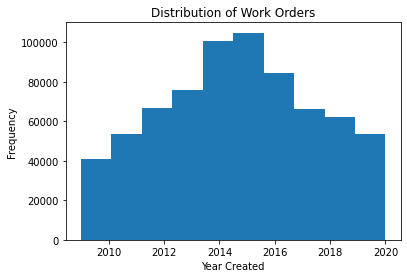

In [82]:
dpr_wo_final['year_create'].plot(kind='hist')
# set the title
plt.title('Distribution of Work Orders')

# add a label to the x-axis
plt.xlabel('Year Created')

plt.show()

In [83]:
wo_count = dpr_wo_final['year_create'].value_counts()
wo_count

2015    104823
2014    100464
2016     84502
2013     75680
2012     66733
2017     66022
2018     62160
2011     53742
2019     43049
2010     31842
2020     10633
2009      9160
Name: year_create, dtype: int64

In [84]:
wo_year = wo_count.head(12).index.values
wo_year

array([2015, 2014, 2016, 2013, 2012, 2017, 2018, 2011, 2019, 2010, 2020,
       2009])

In [85]:
boro = dpr_wo_final[((dpr_wo_final['BOROUGH'] == 'M') | (dpr_wo_final['BOROUGH'] == 'B') | 
                    (dpr_wo_final['BOROUGH'] == 'Q') | (dpr_wo_final['BOROUGH'] == 'R') | 
                    (dpr_wo_final['BOROUGH'] == 'X')) &
                  (dpr_wo_final['year_create'].isin(wo_year))]


boro.head(1)



,EVT_CODE,EVT_DESC,EVT_TYPE,EVT_DATE,EVT_OBJECT,EVT_START,EVT_COMPLETED,EVT_CREATED,EVT_COMPLETED_TRUNC,OBJ_OBTYPE,OBJ_CODE,OBJ_DESC,OBJ_XLOCATION,OBJ_YLOCATION,BOROUGH,COMMUNITYBOARD,COUNCILDISTRICT,DEPARTMENT,GISPROPNUM,OMPPROPID,SIGNNAME,year_create,year_completed
0,1853327,DELIVERY of 30 c/y of soil/compost mix to Sout...,JOB,Feb 1 2019 4:15PM,B559,NaN,NaN,Feb 1 2019 4:16PM,NaN,S,B559,South Brooklyn Children's Garden,983446.465505,188936.088384,B,306,39.0,B-06,B559,B559,South Brooklyn Children's Garden,2019,NaN


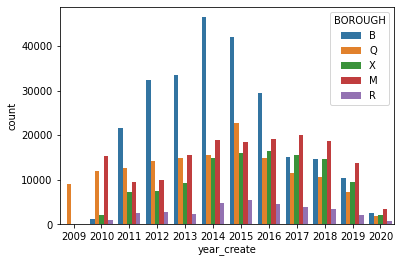

In [86]:
ax = sns.countplot(x="year_create", hue="BOROUGH", data=dpr_wo_final)


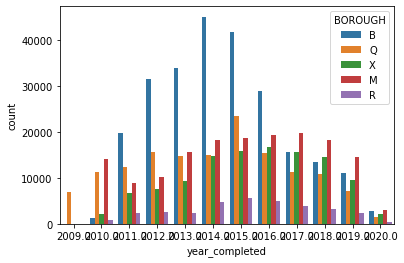

In [89]:
ax = sns.countplot(x="year_completed", hue="BOROUGH", data=dpr_wo_final)